<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center><font size=6>EDA for Data Science in Python</center></h1>

# Problem Statement:

E-commerce companies often face challenges in managing and analyzing large volumes of order data. Understanding the patterns, trends, and customer preferences hidden within this data is crucial for optimizing operations, improving customer experience, and driving sales. This dataset contains information about customer orders, including order details, customer demographics, payment methods, and discounts.

# Objective:
To explore and analyze the order data to gain insights into customer behavior, identify trends in purchasing patterns, and understand the effectiveness of discount strategies.

# Key Questions to be Answered:
1. What are the major trends and patterns in customer orders over time?
2. Which categories of items are most frequently ordered?
3. How does the order value vary based on different payment methods?
4. Are there specific customer segments that have higher order values or purchase more frequently?
5. How effective are the discount strategies in influencing customer purchasing behavior?
6. Are there any correlations between customer demographics (e.g., gender, age) and order characteristics?
7. How has customer order behavior evolved over the years?
8. Are there any regional variations in order patterns or preferences?

# Data Dictionary:
- order_id: Unique identifier for each order
- order_date: Date of the order
- status: Order status (e.g., processing, shipped, delivered)
- item_id: Unique identifier for each item
- sku: Stock Keeping Unit (SKU) for the item
- qty_ordered: Quantity ordered
- price: Price per unit
- value: Total value of the order (qty_ordered x price)
- discount_amount: Amount of discount applied to the order
- total: Total amount after discount (value - discount_amount)
- category: Category of the item
- payment_method: Method of payment used for the order
- bi_st: Billing state
- cust_id: Unique identifier for each customer
- year: Year of the order
- month: Month of the order
- ref_num: Reference number
- Name Prefix: Prefix of the customer's name (e.g., Mr., Mrs., Ms.)
- First Name: First name of the customer
- Middle Initial: Middle initial of the customer's name
- Last Name: Last name of the customer
- Gender: Gender of the customer
- age: Age of the customer
- full_name: Full name of the customer
- E Mail: Email address of the customer
- Customer Since: Date when the customer started using the platform
- SSN: Social Security Number of the customer
- Phone No.: Phone number of the customer
- Place Name: Name of the place associated with the order
- County: County of the place
- City: City of the place
- State: State of the place
- Zip: Zip code of the place
- Region: Region of the place
- User Name: Username of the customer
- Discount_Percent: Percentage of discount applied to the order

By conducting exploratory data analysis on this dataset, we can uncover valuable insights about customer ordering behavior, item preferences, payment methods, and the effectiveness of discounts. These insights can guide strategic decision-making processes to improve customer satisfaction, optimize pricing strategies, and enhance the overall e-commerce experience.

# Load libraries

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [55]:
import pandas as pd
df = pd.read_csv('data1.csv')


In [56]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01-10-2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01-10-2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01-10-2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01-10-2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13-11-2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [57]:
df.tail()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
4995,100362717,06-11-2020,order_refunded,588088,MEFBAT59ABAB1B5BE4E,2,23.0,23.0,0.0,23.0,Men's Fashion,mcblite,Valid,8123,2020,Nov-20,433258,Mr.,Clifford,W,Sterner,M,59,"Sterner, Clifford",clifford.sterner@gmail.com,12-01-1998,422-67-7179,262-322-8916,Waterford,Racine,Waterford,WI,53185,Midwest,cwsterner,0.000000
4996,100362718,06-11-2020,order_refunded,588089,MEFBAT59ABABA32C499,2,80.0,80.0,0.0,80.0,Men's Fashion,mcblite,Valid,8123,2020,Nov-20,433258,Mr.,Clifford,W,Sterner,M,59,"Sterner, Clifford",clifford.sterner@gmail.com,12-01-1998,422-67-7179,262-322-8916,Waterford,Racine,Waterford,WI,53185,Midwest,cwsterner,0.000000
4997,100367017,12-11-2020,canceled,594542,ENTVIZ59BF507A28BBF,2,1611.0,1611.0,300.0,1311.0,Entertainment,jazzvoucher,Gross,8123,2020,Nov-20,433258,Mr.,Clifford,W,Sterner,M,59,"Sterner, Clifford",clifford.sterner@gmail.com,12-01-1998,422-67-7179,262-322-8916,Waterford,Racine,Waterford,WI,53185,Midwest,cwsterner,18.621974
4998,100367867,14-11-2020,order_refunded,595930,MEFBAT59ABAB1B5BE4E-43,2,23.0,23.0,0.0,23.0,Men's Fashion,mcblite,Valid,8123,2020,Nov-20,433258,Mr.,Clifford,W,Sterner,M,59,"Sterner, Clifford",clifford.sterner@gmail.com,12-01-1998,422-67-7179,262-322-8916,Waterford,Racine,Waterford,WI,53185,Midwest,cwsterner,0.000000
4999,100367868,14-11-2020,order_refunded,595931,MEFBAT59ABABA32C499-44,2,80.0,80.0,0.0,80.0,Men's Fashion,mcblite,Valid,8123,2020,Nov-20,433258,Mr.,Clifford,W,Sterner,M,59,"Sterner, Clifford",clifford.sterner@gmail.com,12-01-1998,422-67-7179,262-322-8916,Waterford,Racine,Waterford,WI,53185,Midwest,cwsterner,0.000000


# Data Structure

In [58]:
print(df.shape)  

(5000, 36)


In [59]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5000 non-null   int64  
 1   order_date        5000 non-null   object 
 2   status            5000 non-null   object 
 3   item_id           5000 non-null   int64  
 4   sku               5000 non-null   object 
 5   qty_ordered       5000 non-null   int64  
 6   price             5000 non-null   float64
 7   value             5000 non-null   float64
 8   discount_amount   5000 non-null   float64
 9   total             5000 non-null   float64
 10  category          5000 non-null   object 
 11  payment_method    5000 non-null   object 
 12  bi_st             5000 non-null   object 
 13  cust_id           5000 non-null   int64  
 14  year              5000 non-null   int64  
 15  month             5000 non-null   object 
 16  ref_num           5000 non-null   int64  


In [60]:
print(df.columns)

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')


# Missing Values:

In [61]:
print(df.isnull().sum())  # Count missing values for each column

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64


In [62]:
# remove those records
df = df.dropna() 

In [63]:
# replace with mean value of the column
mean_value = df['discount_amount'].mean()
df['discount_amount'].fillna(mean_value, inplace=True)

In [64]:
# Replace missing values in the column with the median
median_value = df['total'].median()
df['total'].fillna(median_value, inplace=True)

In [65]:
# Replace missing values in the column with the mode
mode_value = df['category'].mode().iloc[0]
df['category'].fillna(mode_value, inplace=True)

# Duplicates

In [66]:
print(df.duplicated().sum()) 

0


In [67]:
# drop duplicates
df = df.drop_duplicates() 

# Summary statistics for numerical variables

In [68]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,1.004125e+08,65514.640112,100354677.0,1.003575e+08,100381371.5,1.004495e+08,1.005622e+08
item_id,5000.0,6.694744e+05,105051.584273,574769.0,5.798980e+05,618072.5,7.379558e+05,9.048480e+05
qty_ordered,5000.0,2.641200e+00,2.993435,1.0,2.000000e+00,2.0,2.000000e+00,5.100000e+01
price,5000.0,7.059053e+02,1423.230983,0.0,3.750000e+01,102.2,6.800000e+02,1.089990e+04
value,5000.0,6.422418e+02,1312.382540,0.0,3.600000e+01,110.0,5.823750e+02,1.089990e+04
discount_amount,5000.0,4.443354e+01,142.664605,0.0,0.000000e+00,0.0,0.000000e+00,1.543906e+03
total,5000.0,5.978083e+02,1252.884050,0.0,3.500000e+01,105.0,5.187600e+02,1.089990e+04
cust_id,5000.0,3.505365e+04,23416.765418,16.0,8.546000e+03,44445.0,5.768800e+04,6.029700e+04
year,5000.0,2.020346e+03,0.475870,2020.0,2.020000e+03,2020.0,2.021000e+03,2.021000e+03
ref_num,5000.0,5.518833e+05,262495.225668,116436.0,3.515680e+05,552138.0,7.619220e+05,9.999790e+05


- The average quantity ordered is around 3, with a minimum of 1 and a maximum of 501.
- The average price and value of orders are relatively high, with some extreme values (e.g., maximum price of 101,262.59).
- The discount amount varies, with an average of 70.04 and a maximum of 30,213.15.
- The data appears to be primarily from the year 2020, with some records from 2021.
- The age of customers ranges from 18 to 75, with an average of 46.49.
- The average discount percentage is 6.07%, with a maximum of 75%.

# Frequency distribution for categorical variables

In [69]:
print(df['category'].value_counts()/len(df['category'])*100)  

category
Mobiles & Tablets     19.02
Men's Fashion         18.04
Women's Fashion       14.08
Appliances             9.60
Superstore             6.80
Soghaat                5.82
Entertainment          5.56
Beauty & Grooming      5.12
Home & Living          4.14
Others                 4.04
Computing              2.46
Health & Sports        2.38
Kids & Baby            2.34
School & Education     0.38
Books                  0.22
Name: count, dtype: float64


In [70]:
print(df['payment_method'].value_counts()/len(df['payment_method'])*100)  

payment_method
cod                56.18
Payaxis            14.02
Easypay            11.82
easypay_voucher     6.00
bankalfalah         3.46
Easypay_MA          3.30
customercredit      1.90
jazzwallet          1.34
jazzvoucher         0.98
apg                 0.86
mcblite             0.14
Name: count, dtype: float64


In [71]:
print(df['Gender'].value_counts()/len(df['Gender'])*100)  

Gender
M    56.12
F    43.88
Name: count, dtype: float64


In [72]:
print(df['status'].value_counts()/len(df['status'])*100)  

status
complete          31.24
canceled          25.14
received          20.34
order_refunded    20.34
refund             1.38
cod                1.30
paid               0.16
closed             0.08
processing         0.02
Name: count, dtype: float64


# Data Visualization:

# Univariate Analysis

In [75]:
import matplotlib.pyplot as plt

def plot_histogram_and_boxplot(data, column):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Plot histogram
    ax1.hist(data[column], bins='auto', color='skyblue', edgecolor='black')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')

    # Plot boxplot
    ax2.boxplot(data[column], vert=False, widths=0.7, patch_artist=True)
    ax2.set_xlabel(column)

    # Set title
    plt.suptitle(f'Histogram and Boxplot of {column}', fontsize=14)

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.4)

    # Show the plot
    plt.show()


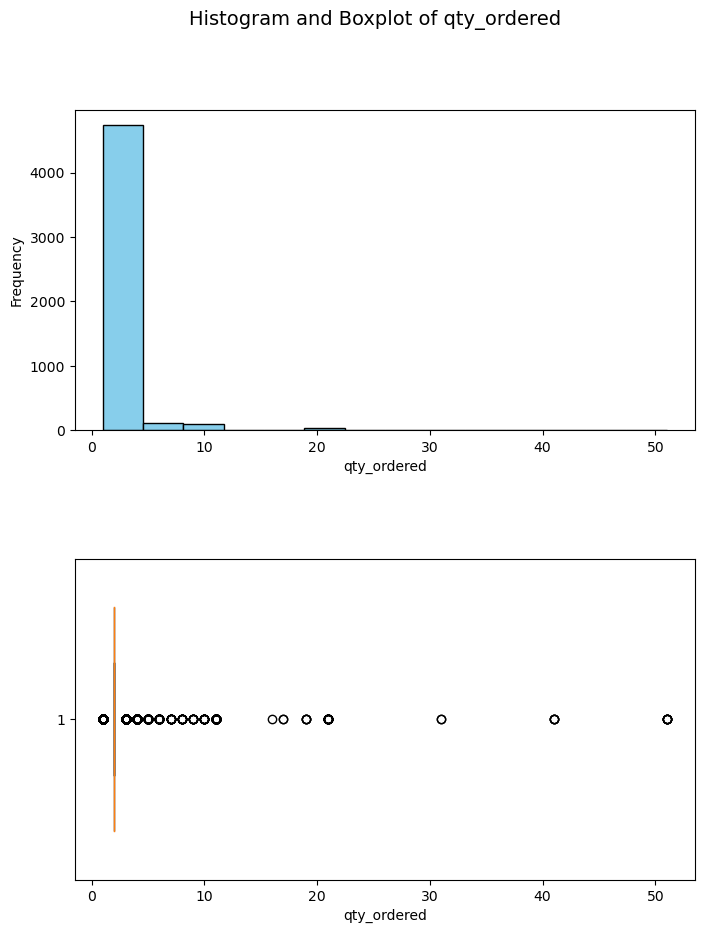

In [76]:
plot_histogram_and_boxplot(df, 'qty_ordered')

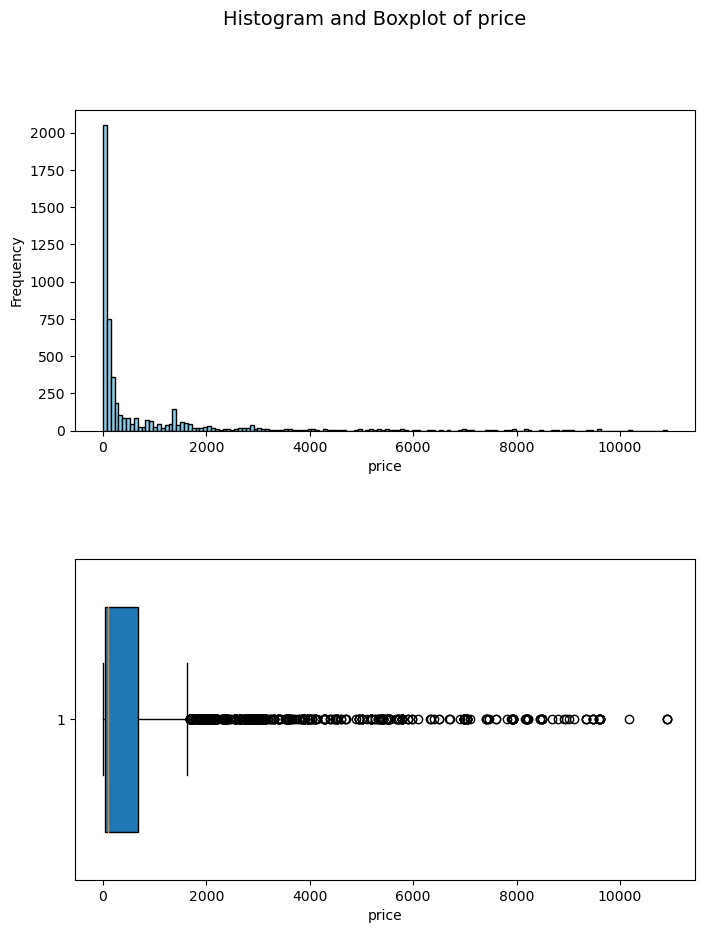

In [79]:
plot_histogram_and_boxplot(df, 'price')

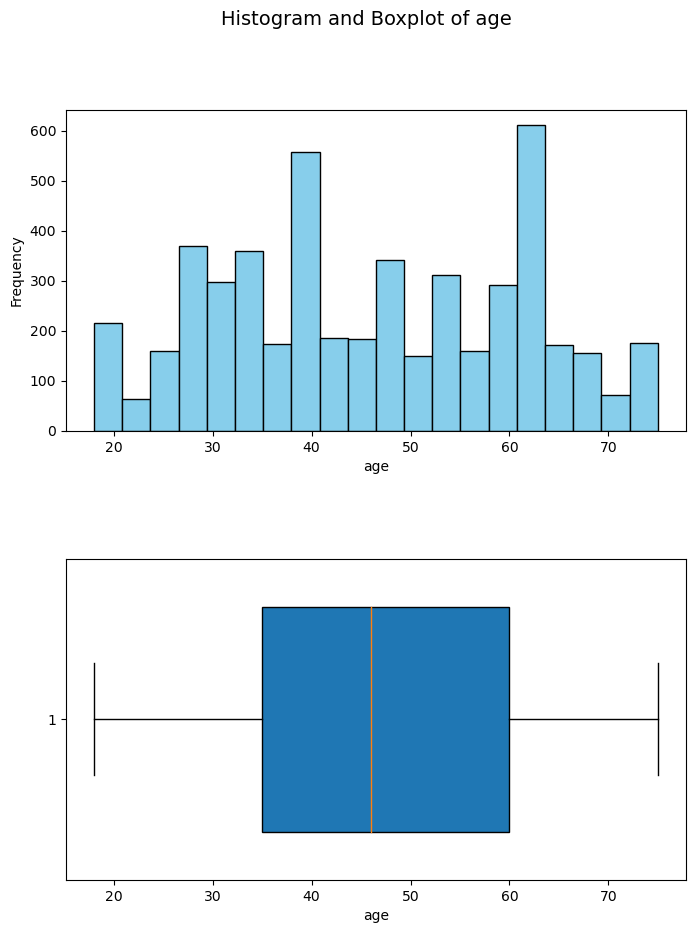

In [80]:
plot_histogram_and_boxplot(df, 'age')

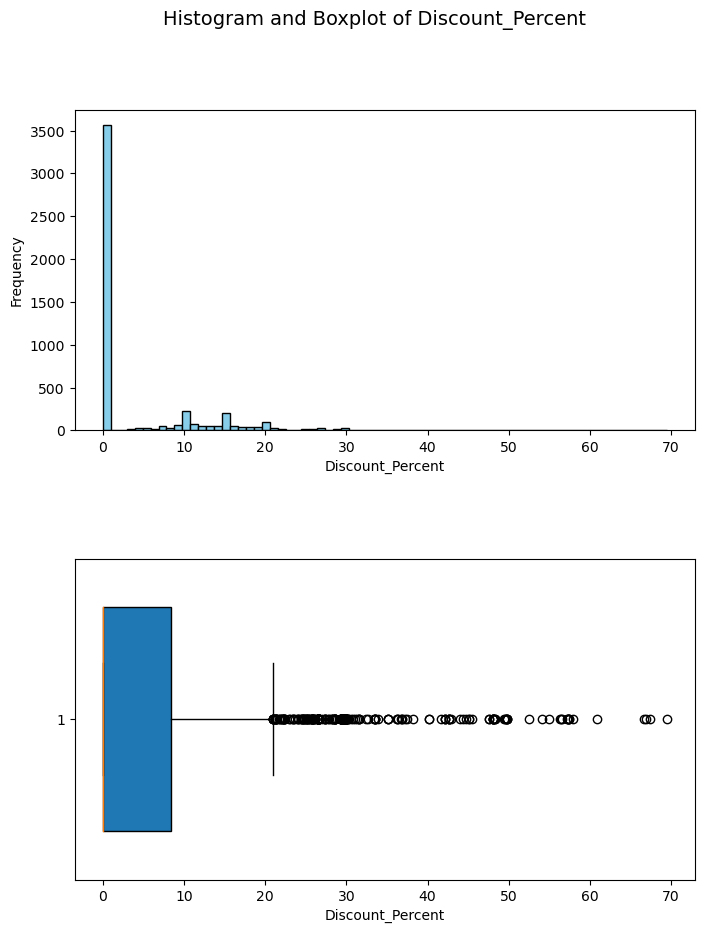

In [82]:
plot_histogram_and_boxplot(df, 'Discount_Percent')

In [87]:
import matplotlib.pyplot as plt

def plot_categorical_distribution(data, column):
    # Calculate the value counts for each category
    category_counts = data[column].value_counts()
    
    # Calculate the percentages for each category
    category_percentages = category_counts / len(data) * 100
    
    # Create a bar plot
    plt.bar(category_percentages.index, category_percentages.values, color='lightgreen')
    
    # Add percentage labels to the plot
    for i, percentage in enumerate(category_percentages):
        plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')
    
    # Set the axis labels and title
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.title(f'Categorical Distribution of {column}')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()


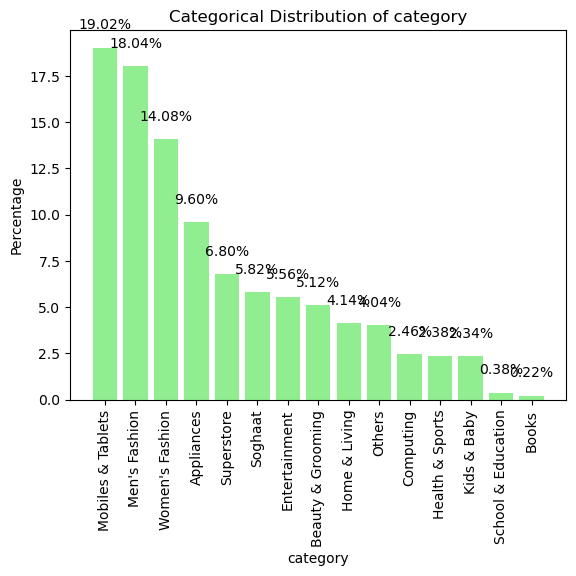

In [88]:
plot_categorical_distribution(df, 'category')

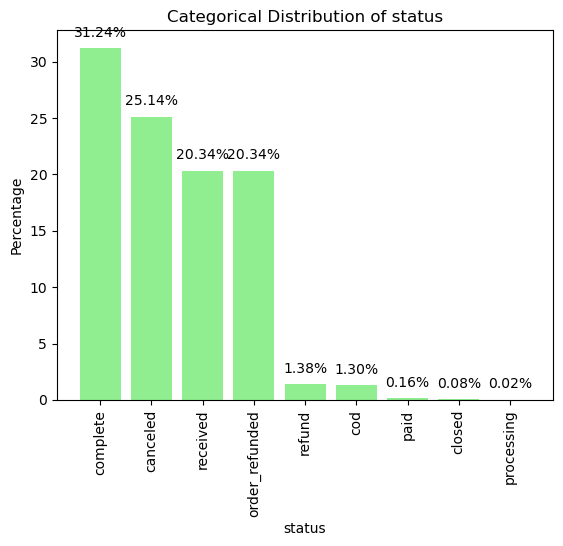

In [89]:
plot_categorical_distribution(df, 'status')

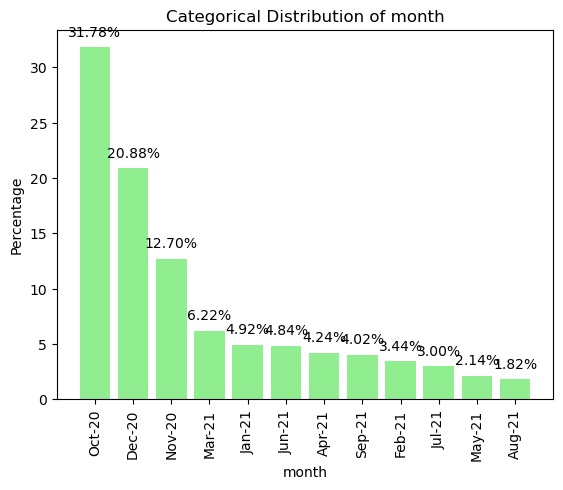

In [90]:
plot_categorical_distribution(df, 'month')

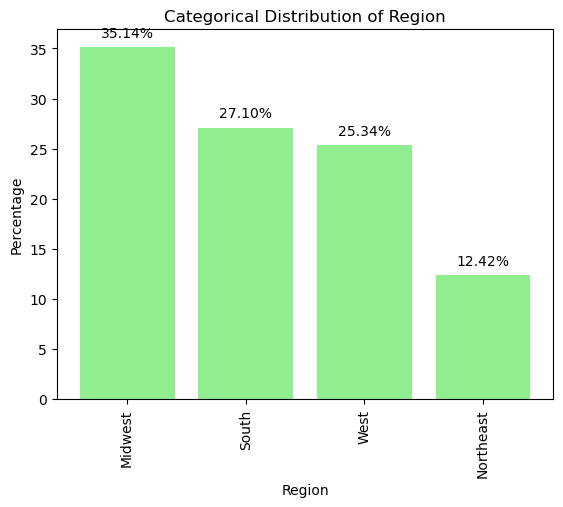

In [93]:
plot_categorical_distribution(df, 'Region')

# Bi-variate analysis

# Correlation Analysis

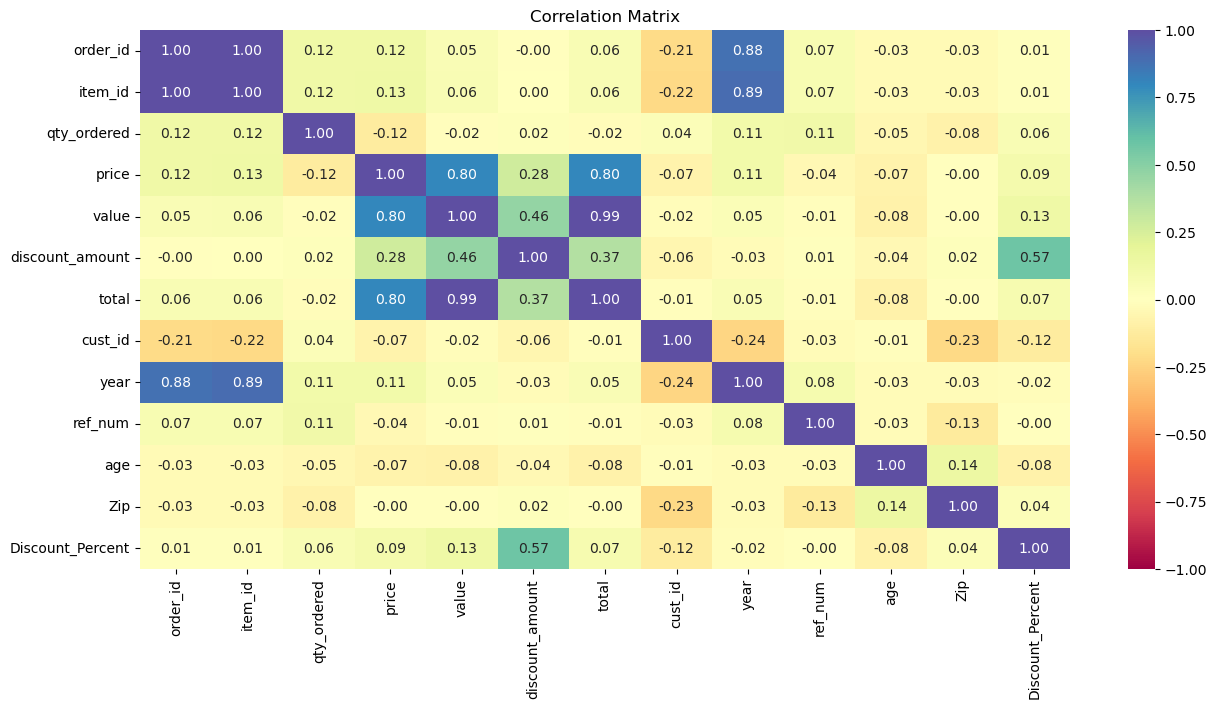

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Correlation Matrix')
plt.show()



# Scatterplots

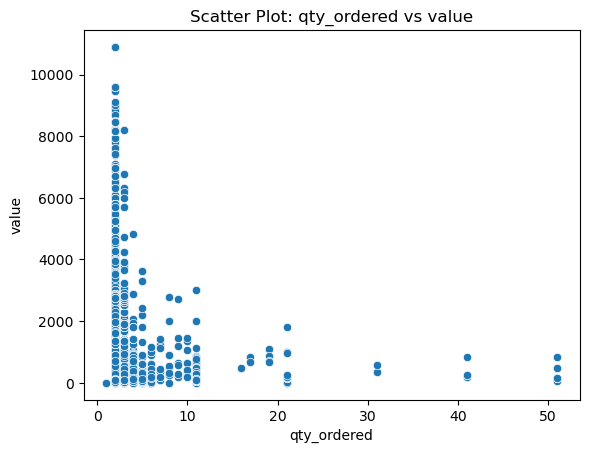

In [101]:
sns.scatterplot(x='qty_ordered', y='value', data=numeric_columns)
plt.title('Scatter Plot: qty_ordered vs value')
plt.show()

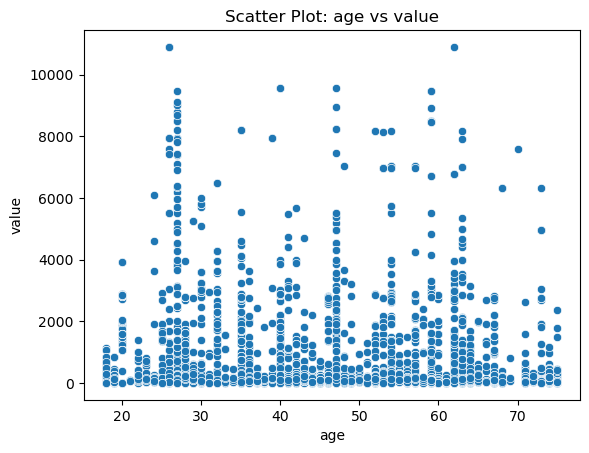

In [104]:
sns.scatterplot(x='age', y='value', data=numeric_columns)
plt.title('Scatter Plot: age vs value')
plt.show()

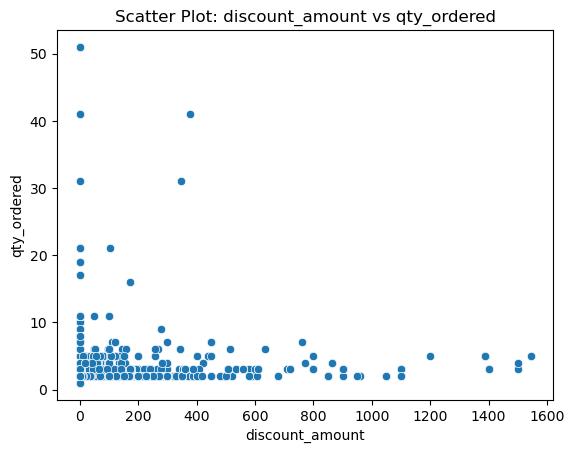

In [105]:
sns.scatterplot(x='discount_amount', y='qty_ordered', data=numeric_columns)
plt.title('Scatter Plot: discount_amount vs qty_ordered')
plt.show()

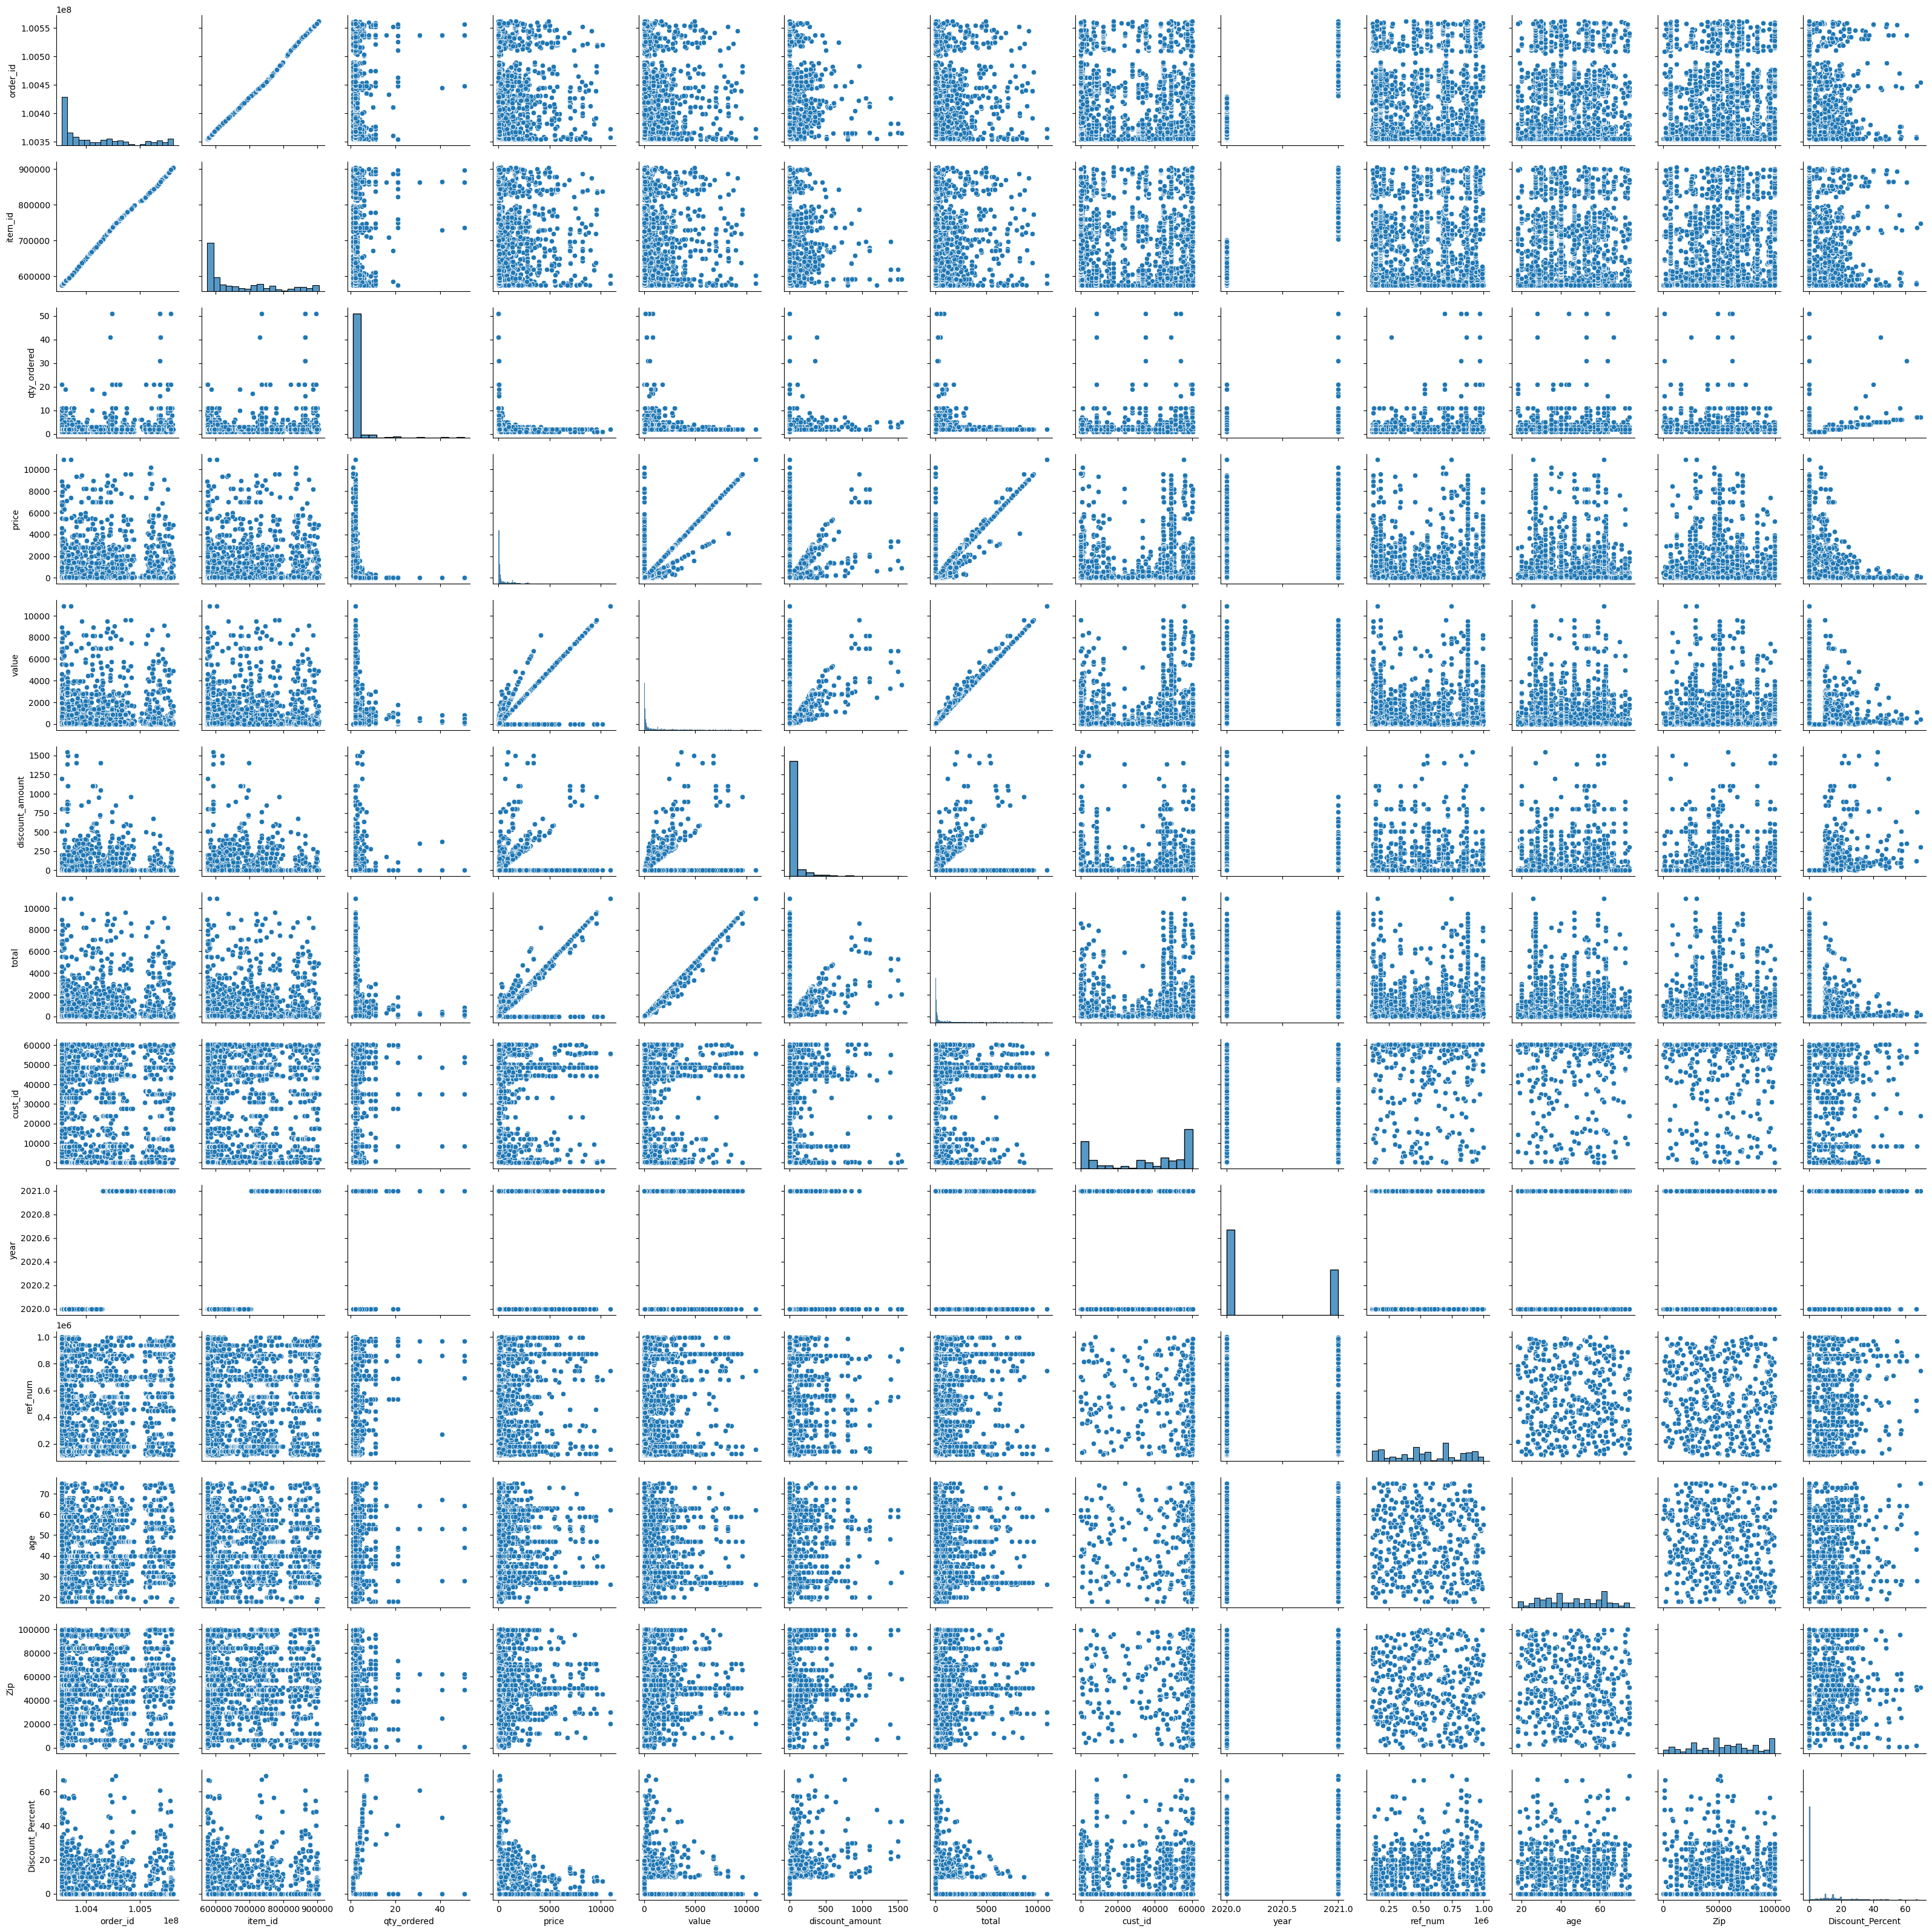

In [103]:
sns.pairplot(df)

# Compute average value for each category

In [110]:
avg_value_by_category = df.groupby('category')['value'].mean().sort_values(ascending=False)  
print(avg_value_by_category)


category
Entertainment         1799.055396
Mobiles & Tablets     1489.558931
Computing             1451.265041
Appliances            1081.711458
Women's Fashion        343.130108
Beauty & Grooming      218.767266
School & Education     217.850211
Home & Living          186.039855
Health & Sports        160.202521
Men's Fashion          144.262528
Others                 139.991089
Superstore             119.104344
Kids & Baby            111.036068
Soghaat                 87.169759
Books                   21.495455
Name: value, dtype: float64


# Hypothesis Testing:

### Perform t-test to compare the means of 'value' for males and females

In [112]:
from scipy.stats import ttest_ind

males = df[df['Gender'] == 'M']['value']
females = df[df['Gender'] == 'F']['value']

t_stat, p_value = ttest_ind(males, females)  
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 1.0276225422011496
P-value: 0.3041771453860852


In the given code, a t-test is performed to compare the means of the 'value' variable for two groups: males and females. Here's an explanation of the output:

T-statistic: 1.0276225422011496
The t-statistic is a measure of the difference between the means of the two groups (males and females) relative to the variation within each group. In this case, the t-statistic value is approximately 1.03.

P-value: 0.3041771453860852
The p-value is a measure of the evidence against the null hypothesis. It represents the probability of observing the data or more extreme data under the assumption that the null hypothesis is true. In this case, the p-value is approximately 0.304.

Interpretation:
Since the p-value (0.304) is greater than the conventional significance level of 0.05, we fail to reject the null hypothesis. The null hypothesis assumes that there is no significant difference in the means of the 'value' variable between males and females. Therefore, based on the given data, we do not have sufficient evidence to conclude that there is a significant difference in the means of 'value' between males and females.

It's important to note that statistical significance should not be equated with practical significance. Even though the test did not show a significant difference, there may still be meaningful differences in the 'value' variable between males and females that are not captured by the statistical test. Additionally, the interpretation of the results should consider the assumptions and limitations of the t-test and the specific context of the data and research question.

# Feature Engineering

In [120]:
# Extract day, month, and year from 'order_date' column
df['order_day'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y').dt.day
df['order_month'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y').dt.month
df['order_year'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y').dt.year

# Create a new feature for the quarter of the year
df['order_quarter'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y').dt.quarter

# Add day of the week as a feature
df['order_day_of_week'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y').dt.dayofweek

In [121]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,discount_percent,order_day,order_month,order_year,order_quarter,order_day_of_week
0,100354678,2020-10-01,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3
1,100354678,2020-10-01,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3
2,100354680,2020-10-01,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3
3,100354680,2020-10-01,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3
4,100367357,2020-11-13,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,13,11,2020,4,4


# Data Transformation:
### Scale 'age' variable using Min-Max scaling

In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['total_scaled'] = scaler.fit_transform(df[['total']])  


In [128]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,discount_percent,order_day,order_month,order_year,order_quarter,order_day_of_week,age_scaled,total_scaled
0,100354678,2020-10-01,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3,0.438596,0.164956
1,100354678,2020-10-01,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3,0.438596,0.017431
2,100354680,2020-10-01,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3,0.438596,0.110019
3,100354680,2020-10-01,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3,0.438596,0.058643
4,100367357,2020-11-13,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,13,11,2020,4,4,0.438596,0.009165


### Apply log transformation on 'total' column

In [132]:
import numpy as np

df['total_log'] = np.log(df['total'] + 1)

In [133]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,discount_percent,order_day,order_month,order_year,order_quarter,order_day_of_week,age_scaled,total_scaled,total_log
0,100354678,2020-10-01,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3,0.438596,0.164956,7.494986
1,100354678,2020-10-01,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3,0.438596,0.017431,5.252273
2,100354680,2020-10-01,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3,0.438596,0.110019,7.090243
3,100354680,2020-10-01,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,1,10,2020,4,3,0.438596,0.058643,6.461781
4,100367357,2020-11-13,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,0.0,13,11,2020,4,4,0.438596,0.009165,4.614130
